<a href="https://colab.research.google.com/github/lucasaires/csv/blob/codigo/TCC_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from pandas import Series
from pandas import concat
from sklearn.svm import SVC
import seaborn as sn

## Importando dados




In [226]:
df = pd.read_csv('https://raw.githubusercontent.com/lucasaires/csv/master/Gala99c2b0e7-be6e-48b5-af96-4989bf24d3fc.csv')
df


,symbol,interval,openTime,open,openLongTime,high,low,close,volume,closeTime,...,trix,typicalPrice,vwap,ema,wma,williamsR,ichimokuClound-conversion,ichimokuClound-base,ichimokuClound-spanA,ichimokuClound-spanB
0,GALAUSDT,15m,13-09-2021 03:00:00,0.02103,1631512800000,0.07805,0.02103,0.06210,718072847.0,13-09-2021 03:14:59,...,NaN,NaN,0.100100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GALAUSDT,15m,13-09-2021 03:15:00,0.06211,1631513700000,0.06300,0.05263,0.05729,271757398.0,13-09-2021 03:29:59,...,NaN,NaN,0.101678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GALAUSDT,15m,13-09-2021 03:30:00,0.05732,1631514600000,0.06066,0.05532,0.06011,140632167.0,13-09-2021 03:44:59,...,NaN,NaN,0.102142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GALAUSDT,15m,13-09-2021 03:45:00,0.06010,1631515500000,0.06884,0.05676,0.06577,301235982.0,13-09-2021 03:59:59,...,NaN,NaN,0.103524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GALAUSDT,15m,13-09-2021 04:00:00,0.06577,1631516400000,0.07707,0.06562,0.07577,474279842.0,13-09-2021 04:14:59,...,NaN,NaN,0.106329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20327,GALAUSDT,15m,12-04-2022 22:45:00,0.20087,1649814300000,0.20174,0.20022,0.20170,2027467.0,12-04-2022 22:59:59,...,NaN,NaN,0.243746,0.067709,0.068820,-2010.284810,0.20070,0.19894,0.199820,0.200865
20328,GALAUSDT,15m,12-04-2022 23:00:00,0.20167,1649815200000,0.20193,0.20044,0.20052,2628167.0,12-04-2022 23:14:59,...,NaN,NaN,0.243745,0.067321,0.068610,-2168.512658,0.20049,0.19894,0.199715,0.200645
20329,GALAUSDT,15m,12-04-2022 23:15:00,0.20053,1649816100000,0.20070,0.19970,0.20026,1693040.0,12-04-2022 23:29:59,...,NaN,NaN,0.243745,0.065879,0.067202,-3365.801887,0.20049,0.19894,0.199715,0.200435
20330,GALAUSDT,15m,12-04-2022 23:30:00,0.20027,1649817000000,0.20246,0.20022,0.20191,2819949.0,12-04-2022 23:44:59,...,NaN,NaN,0.243744,0.064161,0.065353,-3515.217391,0.20057,0.19948,0.200025,0.199740


Ordenando dados por tempo


In [227]:
df = df.sort_values(by=['openLongTime'])
df

,symbol,interval,openTime,open,openLongTime,high,low,close,volume,closeTime,...,trix,typicalPrice,vwap,ema,wma,williamsR,ichimokuClound-conversion,ichimokuClound-base,ichimokuClound-spanA,ichimokuClound-spanB
0,GALAUSDT,15m,13-09-2021 03:00:00,0.02103,1631512800000,0.07805,0.02103,0.06210,718072847.0,13-09-2021 03:14:59,...,NaN,NaN,0.100100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GALAUSDT,15m,13-09-2021 03:15:00,0.06211,1631513700000,0.06300,0.05263,0.05729,271757398.0,13-09-2021 03:29:59,...,NaN,NaN,0.101678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GALAUSDT,15m,13-09-2021 03:30:00,0.05732,1631514600000,0.06066,0.05532,0.06011,140632167.0,13-09-2021 03:44:59,...,NaN,NaN,0.102142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GALAUSDT,15m,13-09-2021 03:45:00,0.06010,1631515500000,0.06884,0.05676,0.06577,301235982.0,13-09-2021 03:59:59,...,NaN,NaN,0.103524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GALAUSDT,15m,13-09-2021 04:00:00,0.06577,1631516400000,0.07707,0.06562,0.07577,474279842.0,13-09-2021 04:14:59,...,NaN,NaN,0.106329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20327,GALAUSDT,15m,12-04-2022 22:45:00,0.20087,1649814300000,0.20174,0.20022,0.20170,2027467.0,12-04-2022 22:59:59,...,NaN,NaN,0.243746,0.067709,0.068820,-2010.284810,0.20070,0.19894,0.199820,0.200865
20328,GALAUSDT,15m,12-04-2022 23:00:00,0.20167,1649815200000,0.20193,0.20044,0.20052,2628167.0,12-04-2022 23:14:59,...,NaN,NaN,0.243745,0.067321,0.068610,-2168.512658,0.20049,0.19894,0.199715,0.200645
20329,GALAUSDT,15m,12-04-2022 23:15:00,0.20053,1649816100000,0.20070,0.19970,0.20026,1693040.0,12-04-2022 23:29:59,...,NaN,NaN,0.243745,0.065879,0.067202,-3365.801887,0.20049,0.19894,0.199715,0.200435
20330,GALAUSDT,15m,12-04-2022 23:30:00,0.20027,1649817000000,0.20246,0.20022,0.20191,2819949.0,12-04-2022 23:44:59,...,NaN,NaN,0.243744,0.064161,0.065353,-3515.217391,0.20057,0.19948,0.200025,0.199740


Verificando quantidade de dados reais nas colunas

In [228]:
df.count()

symbol                       20332
interval                     20332
openTime                     20332
open                         20332
openLongTime                 20332
high                         20332
low                          20332
close                        20332
volume                       20332
closeTime                    20332
closeLongTime                20332
numberOfTrades               20332
adl                          20332
adx                          20305
adx-mdi                      20305
adx-pdi                      20305
atr                          20318
awesomeOscillator            20299
bb-middle                    20313
bb-upper                     20313
bb-lower                     20313
bb-pb                        20313
cci                          20313
fi                               0
kst                          20288
kst-signal                   20280
MACD                         20307
MACD-signal                  20299
MACD-histogram      

Removendo Coluna com poucos dados 


In [229]:
df = df.drop(columns=['fi', 'mfi', 'psar', 'roc', 'trix', 'typicalPrice'])



In [230]:
print(len(df))


20332


Verificando contagem após remoção de colunas desnecessárias

In [231]:
df.count()



symbol                       20332
interval                     20332
openTime                     20332
open                         20332
openLongTime                 20332
high                         20332
low                          20332
close                        20332
volume                       20332
closeTime                    20332
closeLongTime                20332
numberOfTrades               20332
adl                          20332
adx                          20305
adx-mdi                      20305
adx-pdi                      20305
atr                          20318
awesomeOscillator            20299
bb-middle                    20313
bb-upper                     20313
bb-lower                     20313
bb-pb                        20313
cci                          20313
kst                          20288
kst-signal                   20280
MACD                         20307
MACD-signal                  20299
MACD-histogram               20299
obv                 

1. Definindo alvo e período;
2. Criação de lógica para verificação de ganho e de perdas ;
3. Percorrer o datafrime verificando os dados; 
4. Verificação e inserção de dados em uma nova coluna;
5. Inserção de uma nova coluna com os novos dados no datafrime 

Escolha do melhor horizonte Tabela

Desempenho em diferentes moedas. (entender qual melhor moeda -assertividade) 


Suavização do dado
Limitando a profundidade max da árvore 



Modificar a preedição para uma janela no lugar de um índice 


Plotando o gráfico do fechamento

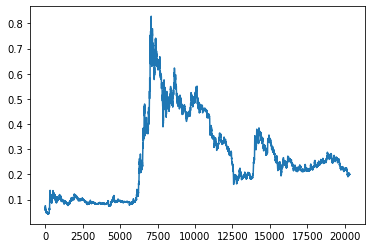

In [232]:
df['close'].plot()
plt.show()

Fechamento após suavização

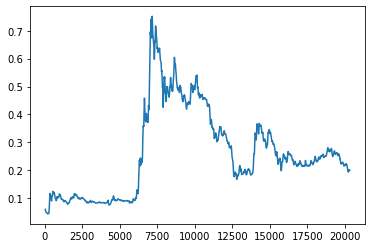

In [233]:
rolling = Series.rolling(df['close'],window=32)
df['close_mean'] = rolling.mean()
df['close_mean'].plot()
plt.show()

In [234]:
closes = df['close_mean']
target = []

period_future = 19
len_closes = len(closes)

for i in range(len_closes):
  if i + period_future < len_closes:
    if float(closes[i+period_future]) >= (float(closes[i]) * 1.01):
      target.append(1)
    else:
      target.append(0)
  else:
      target.append(None)

df['target'] = target

Verificação do tamanho do datafrime antes da remoção dos valores nulos

In [235]:
print(len(df))

20332


In [236]:
df['target']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20327    NaN
20328    NaN
20329    NaN
20330    NaN
20331    NaN
Name: target, Length: 20332, dtype: float64

Remoção dos valores nulos.

In [237]:
df = df[df['close'].notnull()]
df = df[df['volume'].notnull()]
df = df[df['MACD'].notnull()]
df = df[df['rsi'].notnull()]
df = df[df['sma'].notnull()]
df = df[df['vwap'].notnull()]
df = df[df['obv'].notnull()]
df = df[df['ema'].notnull()]
df = df[df['wma'].notnull()]
df = df[df['target'].notnull()]
df = df[df['williamsR'].notnull()]

Suavização dos indicadores

In [238]:
window = 15

rolling = Series.rolling(df['rsi'],window)
df['rsi_mean'] = rolling.mean()

rolling = Series.rolling(df['sma'],window)
df['sma_mean'] = rolling.mean()

rolling = Series.rolling(df['vwap'],window)
df['vwap_mean'] = rolling.mean()

rolling = Series.rolling(df['close'],window)
df['close_mean'] = rolling.mean()

rolling = Series.rolling(df['sma'],window)
df['volume_mean'] = rolling.mean()

rolling = Series.rolling(df['MACD'],window)
df['MACD_mean'] = rolling.mean()

rolling = Series.rolling(df['obv'],window)
df['obv_mean'] = rolling.mean()

rolling = Series.rolling(df['ema'],window)
df['ema_mean'] = rolling.mean()

rolling = Series.rolling(df['wma'],window)
df['wma_mean'] = rolling.mean()

rolling = Series.rolling(df['target'],window)
df['target_mean'] = rolling.mean()

rolling = Series.rolling(df['williamsR'],window)
df['williamsR_mean'] = rolling.mean()


In [239]:
df = df[df['close_mean'].notnull()]
df = df[df['volume_mean'].notnull()]
df = df[df['MACD_mean'].notnull()]
df = df[df['rsi_mean'].notnull()]
df = df[df['sma_mean'].notnull()]
df = df[df['vwap_mean'].notnull()]
df = df[df['obv_mean'].notnull()]
df = df[df['ema_mean'].notnull()]
df = df[df['wma_mean'].notnull()]
df = df[df['target_mean'].notnull()]
df = df[df['williamsR_mean'].notnull()]

Verificação do tamanho do datafrime após remoção dos nulos 

In [240]:
print(len(df))

20274


Divisão do df para treino e test

In [241]:
split_df = int(len(df) * 0.70)   

df_train = df.iloc[:split_df,:]
df_test = df.iloc[split_df:,:]   

print('tamanho df treino: ' + str(len(df_train)))
print('tamanho df teste: ' + str(len(df_test)))
print(len(df_train)+len(df_test) == len(df))


tamanho df treino: 14191
tamanho df teste: 6083
True


## Escolha dos algoritmos de aprendizagem de máquina

* AdaBoost  
* RandomForest  
* GradientBoosting  

Catboost || rede neural - mlp


## Importando algoritmos de aprendizagem de máquina

variar param random florest - max-leaf-nodes


In [242]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier()
rf_clf = RandomForestClassifier()
grad_clf = GradientBoostingClassifier()


### Funções para predição.

Verifica a possibilidade de impor restrições ao modelo. (API - fit:) 
mexer na quantidade de hiper-parametros 

In [243]:
def prediction_features(clf,target, dataFrame, features):
    param_grid = {}
    grid= GridSearchCV(clf, param_grid=param_grid, verbose=1, cv=5)

    grid.fit(dataFrame[features],dataFrame[target])
    clf.fit(dataFrame[features],dataFrame[target])
    print('resultado do algoritmo: ')
    print(grid.best_score_)
    print('features importantes:')
    print(clf.feature_importances_)
    return grid.best_score_, clf.feature_importances_
    


## Treinando algoritmos com features não tratadas


Suavização de todos as features de entrada

In [244]:
feature_train = [ 
'volume_mean',
'MACD_mean',
'close_mean',
'rsi_mean',
'sma_mean',
'vwap_mean',
'obv_mean',
'ema_mean',
'wma_mean',
'williamsR_mean'
# 'bb-middle',        
# 'bb-upper',         
# 'bb-lower',         
# 'bb-pb',            
# 'cci'  
]

In [245]:
ada_results_1,ada_features_1 = prediction_features(ada_clf, 'target', df_train, feature_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
resultado do algoritmo: 
0.6206846597812955
features importantes:
[0.06 0.12 0.02 0.28 0.06 0.22 0.08 0.06 0.04 0.06]


In [246]:
rf_results_1,rf_features_1 = prediction_features(rf_clf, 'target', df_train, feature_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
resultado do algoritmo: 
0.6084891775955613
features importantes:
[0.06586126 0.15664207 0.05874214 0.28396723 0.06465431 0.09375316
 0.07491232 0.07022367 0.06731865 0.06392518]


In [247]:
grad_results_1,grad_features_1 = prediction_features(grad_clf, 'target', df_train, feature_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
resultado do algoritmo: 
0.6408348580788926
features importantes:
[0.02038806 0.05142546 0.01488094 0.67367474 0.02788977 0.07627601
 0.04707206 0.02351216 0.02987794 0.03500286]


In [248]:
def formater_porcent(value):
    return float(( "%.2f" % (float(value) * 100)))

Treino

In [249]:
ADABOOST = 'ada'
RANDOMFOREST = 'rf'
GRADIENTBOOST = 'grad'

def validation_predict(clf, param_grid, df_train, df_test, features, target, nome_clf):
    
    print(nome_clf + ': ' + target)
    
    grid= GridSearchCV(clf, param_grid, verbose=1, cv=5)
    grid.fit(df_train[features],df_train[target])

    grid.best_score_
    p = grid.predict(df_test[features])

    new_column = nome_clf+'_'+target+'_predict'
    df_test[new_column] = p

    confusion_matrix = pd.crosstab(df_test[target], df_test[new_column], rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()    

    hits = df_test[df_test[new_column] == df_test[target]]
    print('Resultado do algoritmo: ')
    print(float(len(hits))/len(df_test))
    return formater_porcent(float(len(hits))/len(df_test))

Testanto RF

In [250]:
features = [ 
'volume_mean',
'MACD_mean',
'close_mean',
'rsi_mean',
'sma_mean',
'vwap_mean',
'obv_mean',
'ema_mean',
'wma_mean',
'williamsR_mean',
# 'bb-middle',        
# 'bb-upper',         
# 'bb-lower',         
# 'bb-pb',            
# 'cci',              
]


RANDOMFOREST: target
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


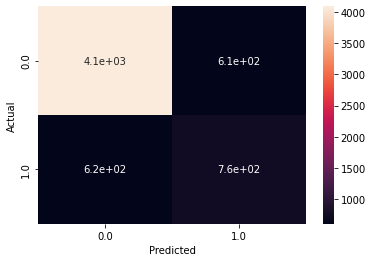

Resultado do algoritmo: 
0.7974683544303798


79.75

In [251]:
rf_param_grid ={'n_estimators': list(range(1,11)), 
            'max_depth': [2],
            'min_samples_leaf': [1],
            'min_weight_fraction_leaf': np.arange(0.1, 0.5, 0.1),
            'n_jobs': [1],
            'random_state': [10],
            'verbose': [0]}


validation_predict(rf_clf, rf_param_grid, df_train, df_test, features, 'target', 'RANDOMFOREST')


Testando ADA

ADABOOST: target
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


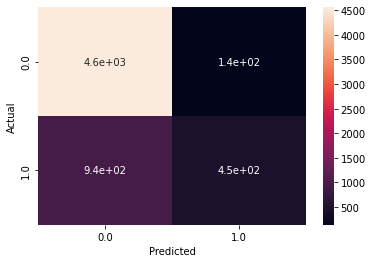

Resultado do algoritmo: 
0.8237711655433174


82.38

In [252]:
ada_param_grid ={'n_estimators': [160], 
             'learning_rate': [0.09],
            'random_state': [1]}
            
validation_predict(ada_clf, ada_param_grid, df_train, df_test, features,'target', 'ADABOOST')

GRADIENTBOOST: target
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


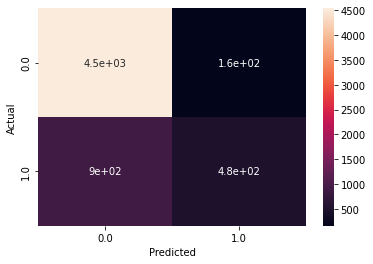

Resultado do algoritmo: 
0.8259082689462436


82.59

In [253]:
grad_param_grid ={'loss': ['deviance'], 
            'learning_rate': [0.09],
            'n_estimators': [150],
            'max_depth': [1],
            'min_samples_leaf': [5],
            'verbose': [0],
            'random_state': [1]}

validation_predict(grad_clf, grad_param_grid, df_train, df_test, features, 'target', 'GRADIENTBOOST')